### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import set_config
set_config(display='diagram')

In [2]:
credit_df=pd.read_csv('clean_dataset.csv') 

In [3]:
credit_df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
credit_df.shape

(690, 16)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [6]:
credit_df.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [7]:
credit_df['Industry'].unique()

array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research'], dtype=object)

In [8]:
credit_df['Ethnicity'].unique()

array(['White', 'Black', 'Asian', 'Latino', 'Other'], dtype=object)

In [9]:
credit_df['Citizen'].unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

In [10]:
credit_df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [26]:
# check the class balance
print(f'The class unique is :{credit_df["Approved"].unique()}')
print(f'The class unique values counts is :{credit_df["Approved"].value_counts()}')

The class unique is :[1 0]
The class unique values counts is :0    383
1    307
Name: Approved, dtype: int64


### Prepare the data

In [11]:
X=credit_df.drop(['Industry','Approved'], axis=1)
y=credit_df['Approved']

### Split the data set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Ethnicity',
       'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income'],
      dtype='object')

In [14]:
columns=[]
for column in X.columns:
    if X[column].dtype=='object':
        columns.append(column)
print(columns)

['Ethnicity', 'Citizen']


In [15]:
# create the transformer
transformer=make_column_transformer((OneHotEncoder(drop='if_binary'),columns),
                                    remainder=StandardScaler())

In [16]:
#create the pipe
logreg_pipe=Pipeline(
            steps=[('transformer',transformer),
                   ('model',LogisticRegression())])
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Ethnicity', 'Citizen'])])),
                ('model', LogisticRegression())])

In [17]:
preds=logreg_pipe.predict(X_test)

In [18]:
coef=logreg_pipe.named_steps['model'].coef_
coef

array([[-0.46924522,  0.75998095, -1.05271903,  0.24448674,  0.51733731,
        -0.75107298, -0.72182051,  1.47273425, -0.05160968,  0.30442969,
        -0.18267065,  0.13229449,  0.13210613,  0.25421135,  1.76872126,
         0.41428455,  0.35375295, -0.07348373, -0.12572255,  1.77923286]])

In [19]:
X.shape

(690, 14)

In [22]:
print(f'The confusion Matrix is:{confusion_matrix(y_test,preds)}')
print('\n')
print(f'The confusion Matrix is:{classification_report(y_test,preds)}')
print('\n')
print(f'The accuracy score is: {accuracy_score(preds,y_test)}')

The confusion Matrix is:[[88 22]
 [11 86]]


The confusion Matrix is:              precision    recall  f1-score   support

           0       0.89      0.80      0.84       110
           1       0.80      0.89      0.84        97

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207



The accuracy score is: 0.8405797101449275


Since the class 0 has 383 data pls, which is 76 data pts higher than class 1, the datas are imbalanced,and the accurcy result is not good for evaluation for the mode

0    383

1    307

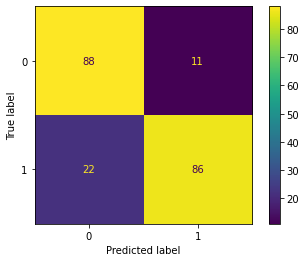

In [27]:
conf_matrix=confusion_matrix(preds,y_test,labels=logreg_pipe.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels = [0,1])
disp.plot()
plt.show()

<AxesSubplot:>

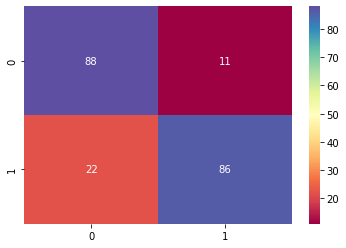

In [32]:
sns.heatmap(conf_matrix, annot = True, cmap='Spectral')